<a href="https://colab.research.google.com/github/LordHandLee/HonCSC499_detect_falls_soccer/blob/main/CNN_base_fallen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 7.2 MB/s eta 0:00:00


In [1]:
from google.colab import drive
import numpy as np
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
import glob

import matplotlib.pyplot as plt
import cv2
from skimage import data,io
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers.experimental import preprocessing
#from autokeras.utils import data_utils

from sklearn.model_selection import train_test_split
import pathlib

In [2]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
data_dir = "/content/drive/MyDrive/honor_thesis/image_depo/"
# data_dir = pathlib.Path(data_dir).with_suffix('')
# for i in data_dir.glob("*"):
#   print(i)
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3)
width = 150
height = 150
trainDatagen = datagen.flow_from_directory(directory=data_dir, target_size=(width, height),
                                           class_mode='binary',
                                           batch_size=16,
                                           subset='training')
valDatagen = datagen.flow_from_directory(directory=data_dir, target_size=(width, height),
                                           class_mode='binary',
                                           batch_size=16,
                                           subset='validation', shuffle=False)

Found 611 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [4]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=30)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [9]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=[keras.metrics.BinaryAccuracy(), keras.metrics.Precision(),
                              keras.metrics.Recall(),
                              tfa.metrics.F1Score(num_classes=1,
                                                  average='macro',
                                                  threshold=0.5)])

history = model.fit(trainDatagen, steps_per_epoch = len(trainDatagen),
                    epochs=500, validation_data = valDatagen,
                    validation_steps = len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 322s 8s/step - loss: 0.6867 - binary_accuracy: 0.5499 - precision_1: 0.5576 - recall_1: 0.4902 - f1_score: 0.5217 - val_loss: 0.6852 - val_binary_accuracy: 0.5000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/500
39/39 [==============================] - 3s 66ms/step - loss: 0.6578 - binary_accuracy: 0.6334 - precision_1: 0.6414 - recall_1: 0.6078 - f1_score: 0.6242 - val_loss: 0.6596 - val_binary_accuracy: 0.6462 - val_precision_1: 0.6131 - val_recall_1: 0.7923 - val_f1_score: 0.6913
Epoch 3/500
39/39 [==============================] - 3s 68ms/step - loss: 0.6370 - binary_accuracy: 0.6547 - precision_1: 0.6690 - recall_1: 0.6144 - f1_score: 0.6405 - val_loss: 0.6430 - val_binary_accuracy: 0.7115 - val_precision_1: 0.7236 - val_recall_1: 0.6846 - val_f1_score: 0.7036
Epoch 4/500
39/39 [==============================] - 3s 71ms/step - loss: 0.6001 - binary_accuracy: 0.7267 - precision_1: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 73984)             0

In [6]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer=keras.optimizers.Adam(learning_rate=0.00001), metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(trainDatagen, steps_per_epoch = len(trainDatagen),
                    epochs=500, validation_data = valDatagen,
                    validation_steps = len(valDatagen),
                    callbacks=[early_stop])

Epoch 1/500
39/39 [==============================] - 389s 10s/step - loss: 0.6831 - binary_accuracy: 0.5597 - val_loss: 0.6754 - val_binary_accuracy: 0.5923
Epoch 2/500
39/39 [==============================] - 3s 76ms/step - loss: 0.6597 - binary_accuracy: 0.5974 - val_loss: 0.6561 - val_binary_accuracy: 0.6192
Epoch 3/500
39/39 [==============================] - 3s 78ms/step - loss: 0.6214 - binary_accuracy: 0.6825 - val_loss: 0.6485 - val_binary_accuracy: 0.6077
Epoch 4/500
39/39 [==============================] - 3s 72ms/step - loss: 0.5972 - binary_accuracy: 0.7169 - val_loss: 0.6328 - val_binary_accuracy: 0.7077
Epoch 5/500
39/39 [==============================] - 3s 74ms/step - loss: 0.5653 - binary_accuracy: 0.7349 - val_loss: 0.6176 - val_binary_accuracy: 0.6885
Epoch 6/500
39/39 [==============================] - 3s 76ms/step - loss: 0.5506 - binary_accuracy: 0.7398 - val_loss: 0.6086 - val_binary_accuracy: 0.6500
Epoch 7/500
39/39 [==============================] - 3s 79ms/st

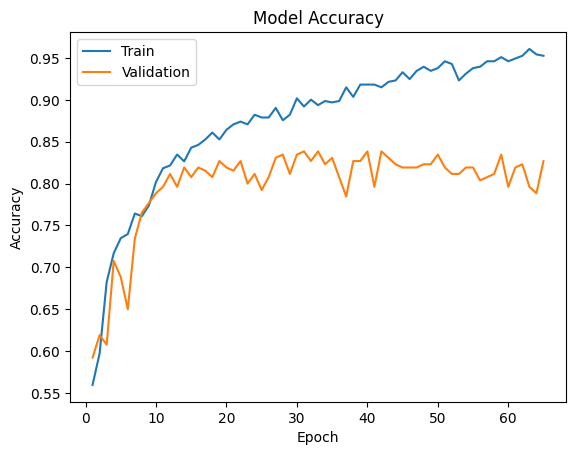

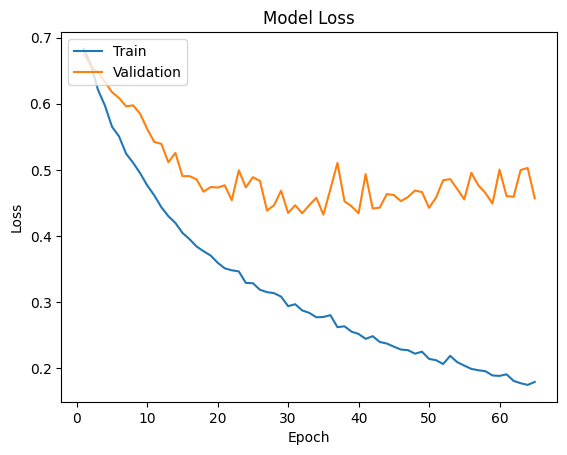

In [7]:
import matplotlib.pyplot as plt
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['binary_accuracy'])
  plt.plot(epochRange,history.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

plotLearningCurve(history,65)

In [8]:
import sklearn

In [10]:
predIdxs = model.predict(valDatagen)

predIdxs = np.where(predIdxs > 0.5, 1, 0)#np.argmax(predIdxs, axis=1)

print(sklearn.metrics.classification_report(valDatagen.labels, predIdxs,
                            target_names=["class 0", "class 1"]))
print(sklearn.metrics.accuracy_score(valDatagen.labels, predIdxs))

17/17 [==============================] - 1s 59ms/step
              precision    recall  f1-score   support

     class 0       0.80      0.87      0.83       130
     class 1       0.86      0.78      0.82       130

    accuracy                           0.83       260
   macro avg       0.83      0.83      0.83       260
weighted avg       0.83      0.83      0.83       260

0.8269230769230769
